In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
data= pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [4]:
df = data.copy()

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [12]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [16]:
df.duplicated().sum()

240

In [19]:
df = df.drop_duplicates()

In [21]:
df.shape

(1359, 12)

In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [27]:
X= df.iloc[:, :11]

In [28]:
y = df.quality

In [29]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [30]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [33]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
596,12.4,0.40,0.51,2.0,0.059,6.0,24.0,0.99940,3.04,0.60,9.3
775,7.2,1.00,0.00,3.0,0.102,7.0,16.0,0.99586,3.43,0.46,10.0
1366,7.3,0.74,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8
1035,10.1,0.37,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5
...,...,...,...,...,...,...,...,...,...,...,...
670,6.9,0.40,0.24,2.5,0.083,30.0,45.0,0.99590,3.26,0.58,10.0
185,8.9,0.31,0.57,2.0,0.111,26.0,85.0,0.99710,3.26,0.53,9.7
702,7.0,0.64,0.02,2.1,0.067,9.0,23.0,0.99700,3.47,0.67,9.4
473,9.9,0.35,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6


In [34]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
880,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9
1549,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1241,9.8,0.370,0.39,2.5,0.079,28.0,65.0,0.99729,3.16,0.59,9.8
789,8.6,0.630,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3
...,...,...,...,...,...,...,...,...,...,...,...
1351,7.2,0.620,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8
195,7.8,0.590,0.33,2.0,0.074,24.0,120.0,0.99680,3.25,0.54,9.4
226,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5
542,9.3,0.715,0.24,2.1,0.070,5.0,20.0,0.99660,3.12,0.59,9.9


In [35]:
y_train

596     6
775     5
1366    5
1035    7
9       5
       ..
670     5
185     5
702     6
473     5
1140    6
Name: quality, Length: 1019, dtype: int64

In [36]:
y_test

880     5
1549    8
1130    6
1241    5
789     5
       ..
1351    6
195     5
226     6
542     5
550     6
Name: quality, Length: 340, dtype: int64

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier()

In [39]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
dt.score(x_test,y_test)

0.4970588235294118

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.603053560961313, 0.975, 'x[10] <= 10.525\ngini = 0.65\nsamples = 1019\nvalue = [7, 43, 423, 408, 126, 12]'),
 Text(0.37218640093786637, 0.925, 'x[6] <= 98.5\ngini = 0.552\nsamples = 630\nvalue = [4, 27, 362, 213, 22, 2]'),
 Text(0.1891559202813599, 0.875, 'x[1] <= 0.405\ngini = 0.577\nsamples = 553\nvalue = [4, 26, 292, 207, 22, 2]'),
 Text(0.04056271981242673, 0.825, 'x[9] <= 0.585\ngini = 0.572\nsamples = 121\nvalue = [0, 1, 39, 68, 11, 2]'),
 Text(0.01875732708089097, 0.775, 'x[8] <= 3.35\ngini = 0.492\nsamples = 39\nvalue = [0, 1, 24, 14, 0, 0]'),
 Text(0.007502930832356389, 0.725, 'x[6] <= 11.5\ngini = 0.368\nsamples = 22\nvalue = [0, 1, 17, 4, 0, 0]'),
 Text(0.0037514654161781946, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.011254396248534583, 0.675, 'x[1] <= 0.245\ngini = 0.265\nsamples = 20\nvalue = [0, 1, 17, 2, 0, 0]'),
 Text(0.007502930832356389, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.015005861664712778, 0.62

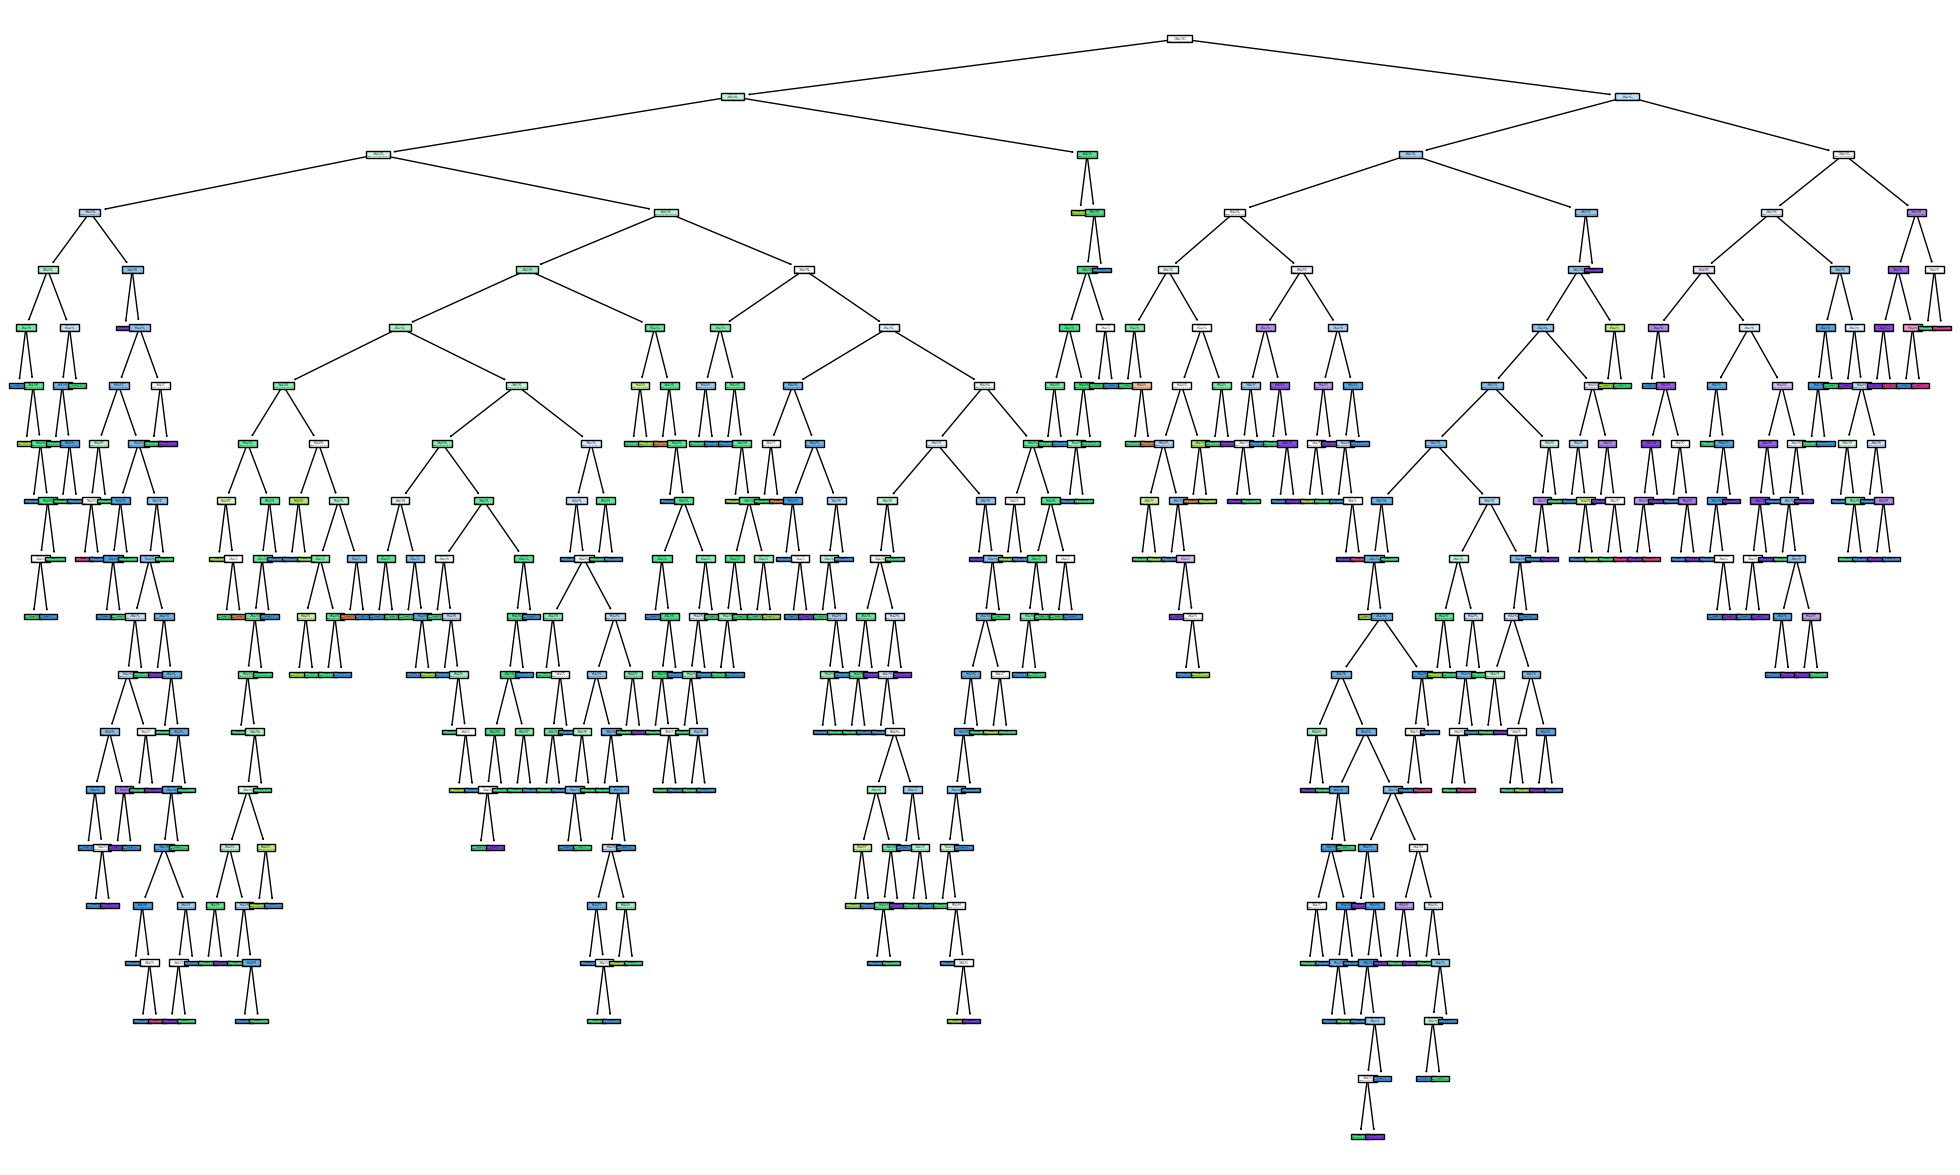

In [43]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt, filled = True)             #before set depth
#tree.plot_tree(model, max_depth=4,filled=True)    #After set depth

[Text(0.4869791666666667, 0.9166666666666666, 'x[10] <= 10.525\ngini = 0.65\nsamples = 1019\nvalue = [7, 43, 423, 408, 126, 12]'),
 Text(0.2708333333333333, 0.75, 'x[6] <= 98.5\ngini = 0.552\nsamples = 630\nvalue = [4, 27, 362, 213, 22, 2]'),
 Text(0.16666666666666666, 0.5833333333333334, 'x[1] <= 0.405\ngini = 0.577\nsamples = 553\nvalue = [4, 26, 292, 207, 22, 2]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[9] <= 0.585\ngini = 0.572\nsamples = 121\nvalue = [0, 1, 39, 68, 11, 2]'),
 Text(0.041666666666666664, 0.25, 'x[8] <= 3.35\ngini = 0.492\nsamples = 39\nvalue = [0, 1, 24, 14, 0, 0]'),
 Text(0.020833333333333332, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.0625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.125, 0.25, 'x[7] <= 0.996\ngini = 0.514\nsamples = 82\nvalue = [0, 0, 15, 54, 11, 2]'),
 Text(0.10416666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14583333333333334, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.25, 0.4166666666666667, 'x[10] <= 9.85\

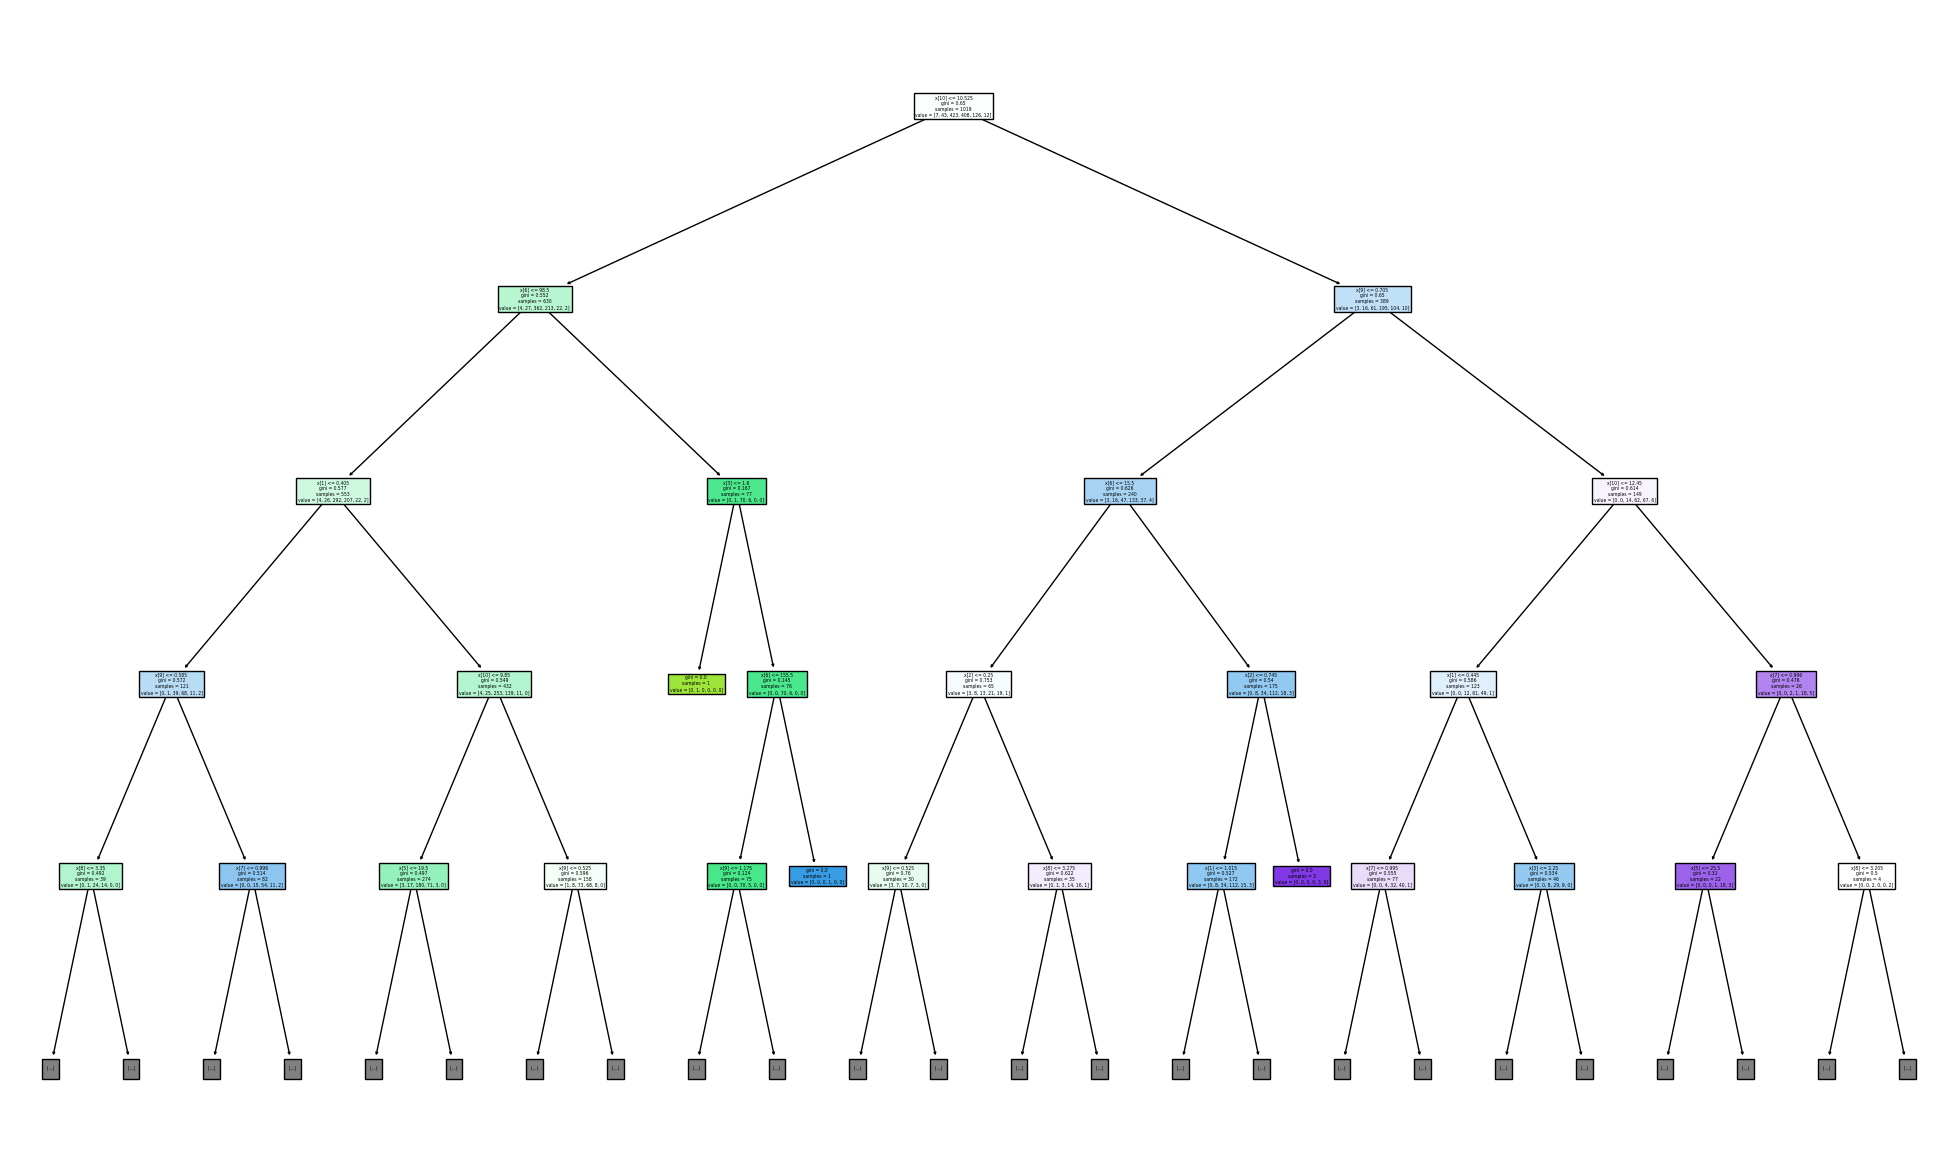

In [44]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt, max_depth=4,filled=True)    #After set depth

In [ ]:
fig.savefig("decistion_tree_classifier.png")

In [46]:
y_predict= dt.predict(x_test)

In [47]:
y_predict

array([5, 6, 4, 6, 5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 8, 5, 5, 6, 5, 6,
       6, 5, 4, 6, 6, 6, 5, 6, 7, 6, 6, 5, 5, 7, 7, 4, 6, 5, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 5, 7, 6, 4, 5, 7, 5, 5, 5, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 5, 5, 6, 6, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 5, 6, 5, 6, 5, 7, 6,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       5, 6, 6, 5, 4, 7, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 8, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 7, 8, 5, 5, 6, 6, 5, 5, 7,
       5, 6, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6,
       7, 7, 5, 6, 7, 6, 5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 6, 4, 6, 5, 6, 6, 6, 7, 5, 7, 7, 8, 5, 5, 5, 5, 8, 6, 5, 6,
       4, 6, 4, 5, 7, 5, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 7, 5, 7, 5, 6, 7,
       6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 7, 5, 7, 6, 5,

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, y_predict)

0.4970588235294118

In [ ]:
# Hyperparameter tuning

In [52]:
grid_param = {
             'criterion': ['gini', 'entropy'],
             'max_depth' : range(2,10,1),  
             'min_samples_leaf' : range(1,8,1),
             'min_samples_split': range(2,8,1),
             'splitter' : ['best', 'random']
    
}

In [50]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid_search = GridSearchCV(estimator=dt, param_grid= grid_param, cv = 5, verbose=1)

In [54]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [55]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1344 candidates, totalling 6720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [56]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [57]:
model_with_best_params = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, min_samples_split=2,  min_samples_leaf=6)

In [58]:
model_with_best_params

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [59]:
model_with_best_params.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [60]:
model_with_best_params.score(x_test,y_test)

0.5529411764705883

[Text(0.49107142857142855, 0.9, 'x[10] <= 10.525\ngini = 0.65\nsamples = 1019\nvalue = [7, 43, 423, 408, 126, 12]'),
 Text(0.26785714285714285, 0.7, 'x[6] <= 98.5\ngini = 0.552\nsamples = 630\nvalue = [4, 27, 362, 213, 22, 2]'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 0.405\ngini = 0.577\nsamples = 553\nvalue = [4, 26, 292, 207, 22, 2]'),
 Text(0.07142857142857142, 0.3, 'x[9] <= 0.585\ngini = 0.572\nsamples = 121\nvalue = [0, 1, 39, 68, 11, 2]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.492\nsamples = 39\nvalue = [0, 1, 24, 14, 0, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.514\nsamples = 82\nvalue = [0, 0, 15, 54, 11, 2]'),
 Text(0.21428571428571427, 0.3, 'x[10] <= 9.85\ngini = 0.549\nsamples = 432\nvalue = [4, 25, 253, 139, 11, 0]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.497\nsamples = 274\nvalue = [3, 17, 180, 71, 3, 0]'),
 Text(0.25, 0.1, 'gini = 0.596\nsamples = 158\nvalue = [1, 8, 73, 68, 8, 0]'),
 Text(0.39285714285714285, 0.5, 'x[9] <= 1.075\ngini = 0.167\nsamples = 7

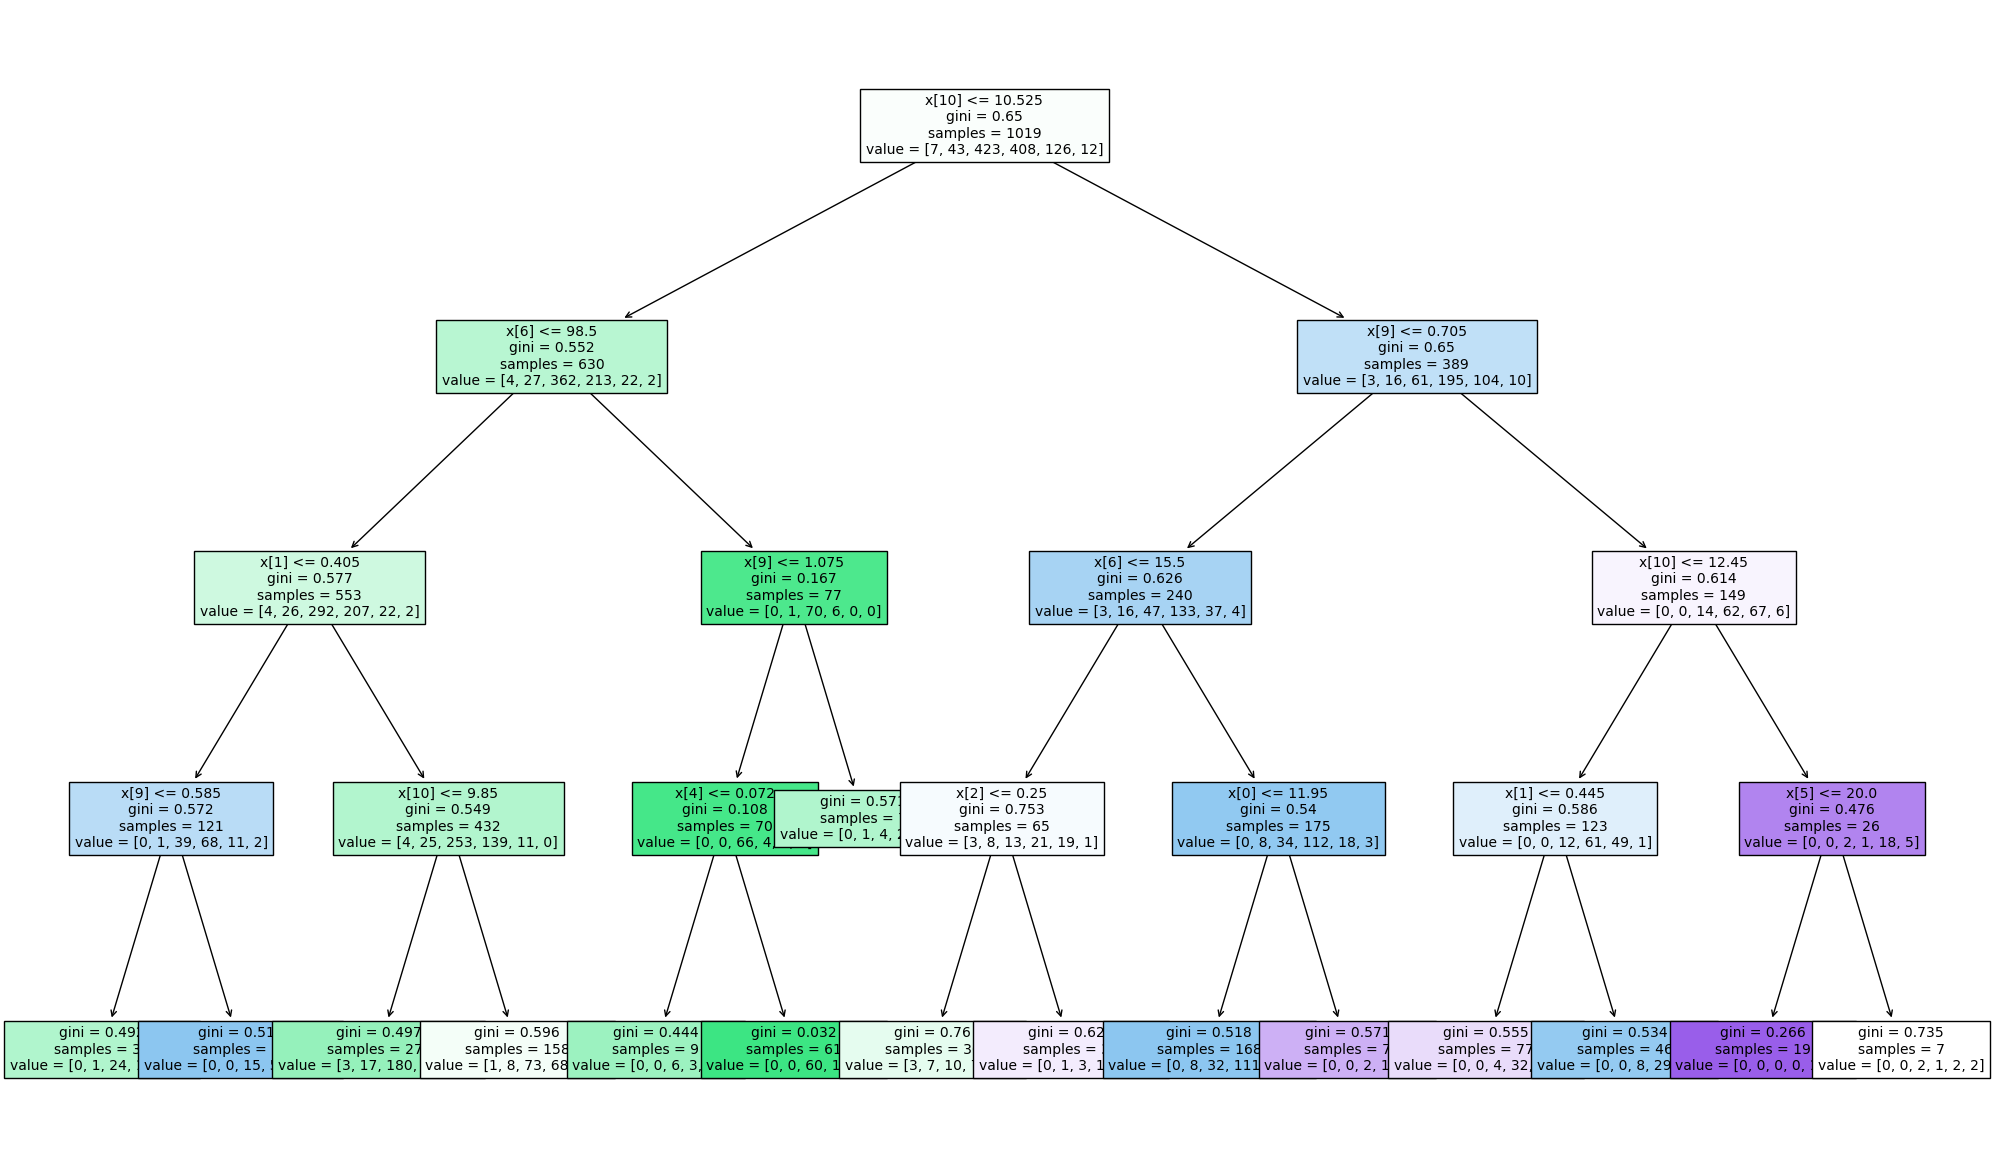

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [63]:
y_prediction2 = model_with_best_params.predict(x_test)

In [64]:
accuracy_score(y_test,y_prediction2)

0.5529411764705883